In [ ]:
from google.colab import files
uploaded = files.upload()  # Select time_series_data.zip when prompted


Saving time_series_data.zip to time_series_data.zip


In [ ]:
import zipfile
import os

zip_path = "/content/time_series_data.zip"  # Update if needed
extract_folder = "/content/time_series_extracted"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted Files:", os.listdir(extract_folder))


Extracted Files: ['daily-minimum-temperatures-in-me.csv', 'sales-of-shampoo-over-a-three-ye.csv', 'Electric_Production.csv', 'monthly-beer-production-in-austr.csv']


In [ ]:
!pip install pandas numpy matplotlib scipy


Original Data:
            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


<ipython-input-6-0d990af08bb6>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method="ffill")


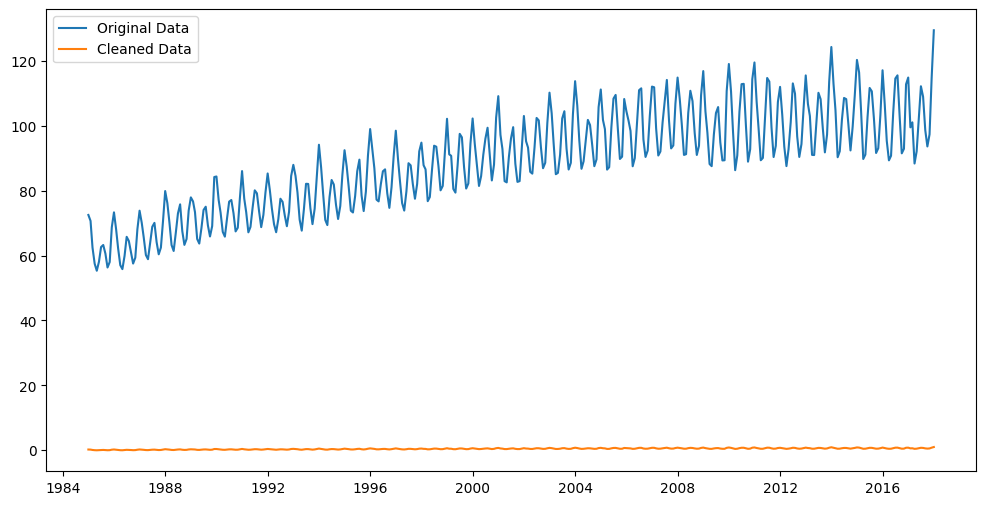

Cleaned dataset saved as /content/cleaned_time_series_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Load Time Series Data
file_path = "/content/time_series_extracted/Electric_Production.csv"  # Change file if needed
data = pd.read_csv(file_path, parse_dates=[0], index_col=0)

print("Original Data:")
print(data.head())  # Display first 5 rows

# Step 2: Handle Missing Values (Forward-fill method)
data_filled = data.fillna(method="ffill")

# Step 3: Remove Duplicates
data_cleaned = data_filled.drop_duplicates()

# Step 4: Detect and Handle Outliers (Z-score method)
z_scores = zscore(data_cleaned.iloc[:, 0])  # Apply Z-score to the first column
outliers = abs(z_scores) > 3
data_cleaned.loc[outliers, data_cleaned.columns[0]] = data_cleaned.iloc[:, 0].median()

# Step 5: Normalize the Data (Min-max normalization)
data_cleaned["Normalized_Value"] = (
    data_cleaned.iloc[:, 0] - data_cleaned.iloc[:, 0].min()
) / (data_cleaned.iloc[:, 0].max() - data_cleaned.iloc[:, 0].min())

# Step 6: Plot Original and Processed Data
plt.figure(figsize=(12, 6))
plt.plot(data, label="Original Data")
plt.plot(data_cleaned["Normalized_Value"], label="Cleaned Data")
plt.legend()
plt.show()

# Step 7: Save cleaned data
cleaned_file_path = "/content/cleaned_time_series_data.csv"
data_cleaned.to_csv(cleaned_file_path)  # ✅ Fixed syntax

print(f"Cleaned dataset saved as {cleaned_file_path}")


In [8]:
from google.colab import files
files.download("/content/cleaned_time_series_data.csv")





<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>